In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.quantum_info.operators import Operator
from sympy.abc import a,b,c,d,e, x
import numpy as np
import sympy as sp
from sympy.logic.boolalg import ANFform
backend = Aer.get_backend('qasm_simulator')

 


{'1': 1024}


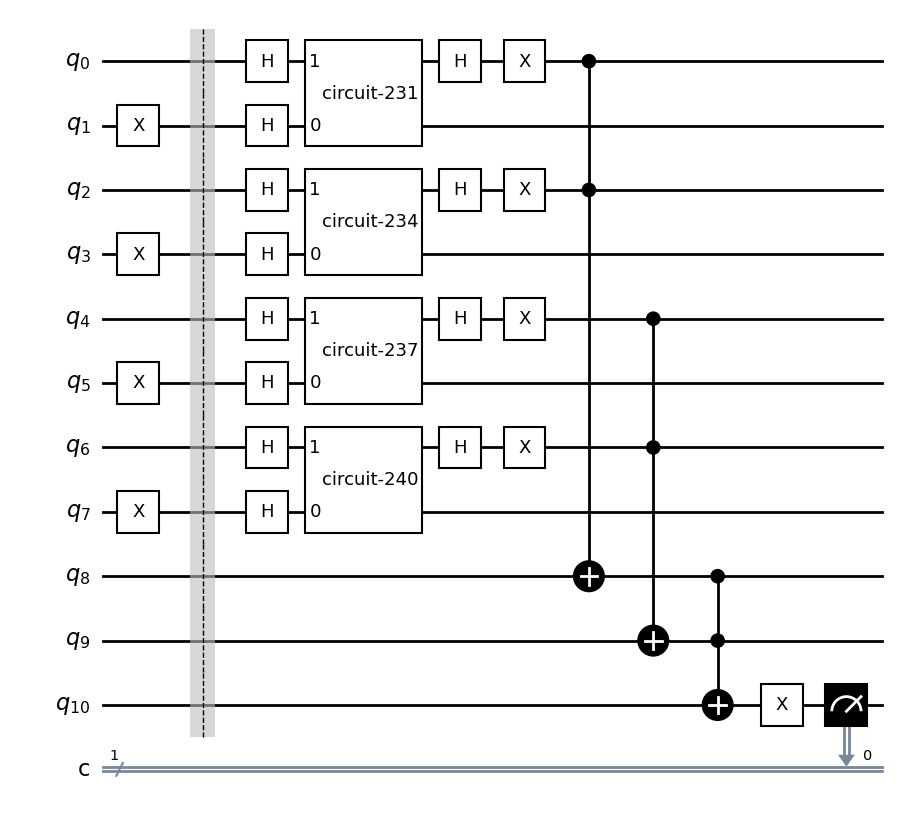

In [13]:

def getDeutsch(func:str):
    ans=np.zeros((len(func)*2, len(func)*2))
    for i in range(len(func)):
        if func[i]=='0':
            ans[2*i][2*i]=1
            ans[2*i+1][2*i+1]=1
        else:
            ans[2*i][2*i+1]=1
            ans[2*i+1][2*i]=1

    qc=QuantumCircuit(2)
    qc.unitary(ans, [0,1])
    return qc.to_gate()

func1="10"
func2="10"
func3="10"
func4="11"

qc=QuantumCircuit(11,1)
qc.x([1,3,5,7])
qc.barrier()
qc.h(range(8))

qc.append(getDeutsch(func1), range(1, -1,-1))
qc.append(getDeutsch(func2), range(3,1,-1))
qc.append(getDeutsch(func3), range(5, 3,-1))
qc.append(getDeutsch(func4), range(7, 5, -1))

qc.h([0,2,4,6])

qc.x([0,2,4,6])

qc.ccx(0,2,8)
qc.ccx(4,6,9)

qc.ccx(8,9,10)
qc.x(10)
qc.measure(10, 0)



nc=transpile(qc, backend)
run=backend.run(nc)
result=run.result()
counts = result.get_counts(qc)


print(counts)


qc.draw('mpl', style='bw')


{'1': 1024}


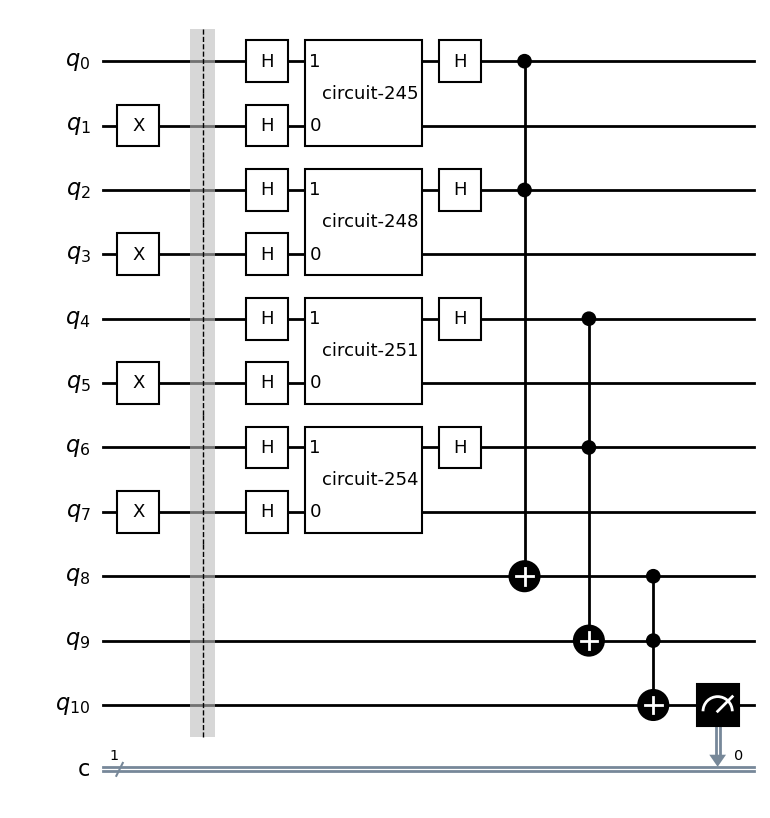

In [14]:

func1="10"
func2="10"
func3="10"
func4="10"

qc=QuantumCircuit(11,1)
qc.x([1,3,5,7])
qc.barrier()
qc.h(range(8))

qc.append(getDeutsch(func1), range(1, -1,-1))
qc.append(getDeutsch(func2), range(3,1,-1))
qc.append(getDeutsch(func3), range(5, 3,-1))
qc.append(getDeutsch(func4), range(7, 5, -1))

qc.h([0,2,4,6])

qc.ccx(0,2,8)
qc.ccx(4,6,9)
qc.ccx(8,9,10)
qc.measure(10,0)


nc=transpile(qc, backend)
run=backend.run(nc)
result=run.result()
counts = result.get_counts(qc)


print(counts)


qc.draw('mpl', style='bw')

{'100': 1024}


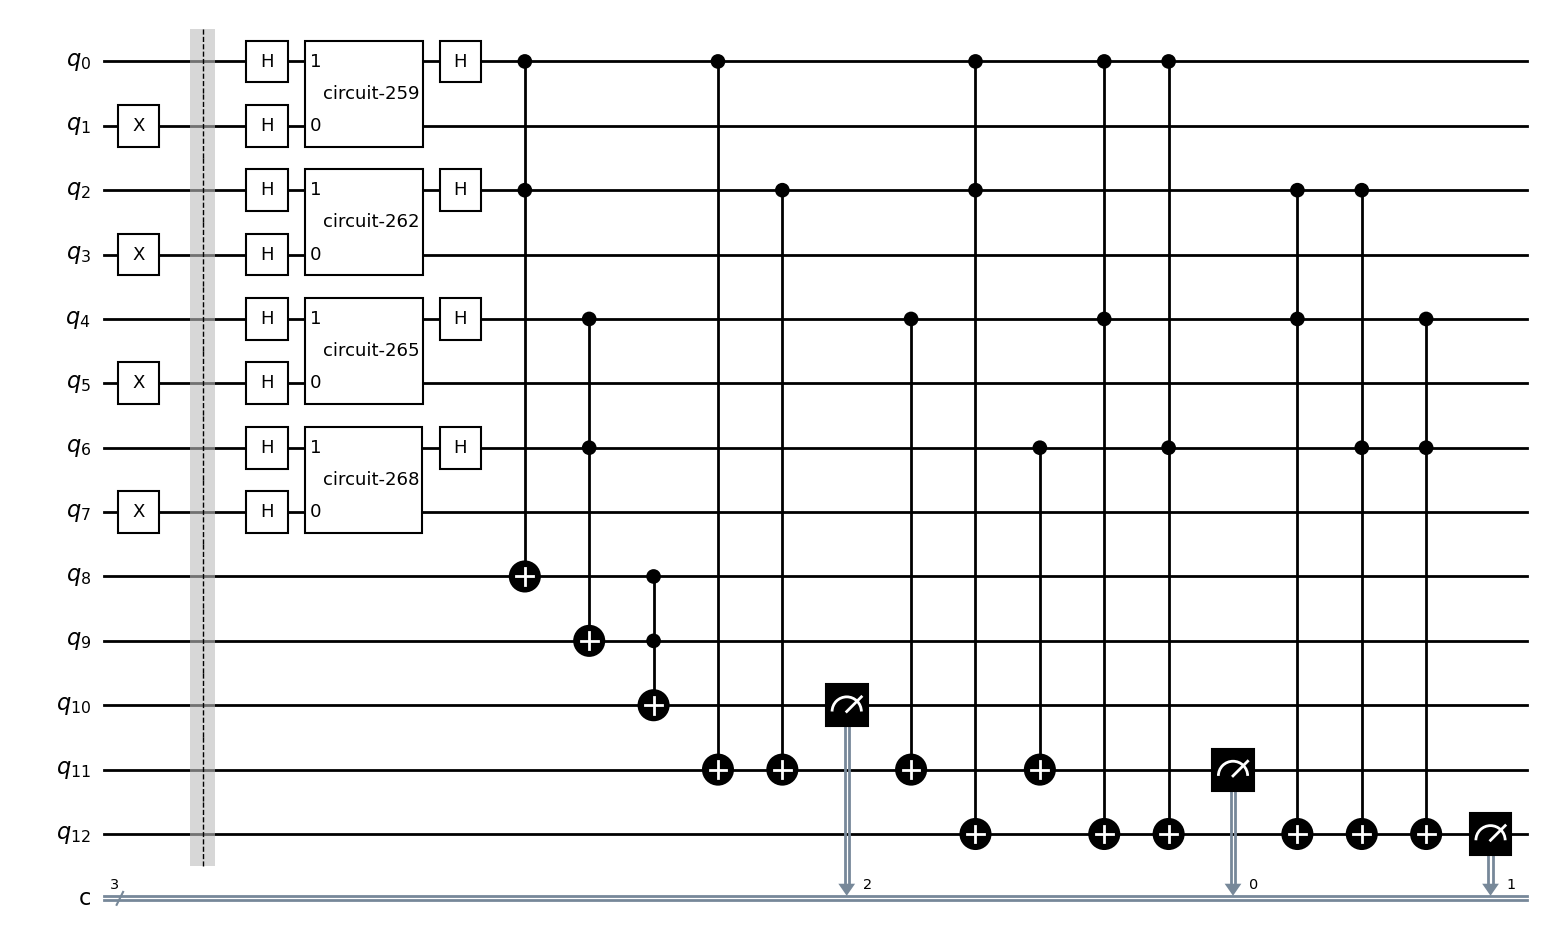

In [15]:

func1="10"
func2="10"
func3="10"
func4="10"

qc=QuantumCircuit(13,3)
qc.x([1,3,5,7])
qc.barrier()
qc.h(range(8))

qc.append(getDeutsch(func1), range(1, -1,-1))
qc.append(getDeutsch(func2), range(3,1,-1))
qc.append(getDeutsch(func3), range(5, 3,-1))
qc.append(getDeutsch(func4), range(7, 5, -1))

qc.h([0,2,4,6])

qc.ccx(0,2,8)
qc.ccx(4,6,9)
qc.ccx(8,9,10)

qc.cx(0,11)
qc.cx(2,11)
qc.cx(4,11)
qc.cx(6,11)

qc.ccx(0,2,12)
qc.ccx(0,4,12)
qc.ccx(0,6,12)
qc.ccx(2,4,12)
qc.ccx(2,6,12)
qc.ccx(4,6,12)

qc.measure(10,2)
qc.measure(12,1)
qc.measure(11,0)

nc=transpile(qc, backend)
run=backend.run(nc)
result=run.result()
counts = result.get_counts(qc)


print(counts)
qc.draw('mpl', style='bw')

In [16]:
# (DJ1) Sukurkite 4 kubitų funkciją, kuri konstruoja  Uf  matricą Deutsch-Jozsa 
# algoritmui pagal reikšmių tekstinę eilutę. Jeigu Deutsch-Jozsa funkcija nėra 
# konstanta ar subalansuota reikia grąžinti None.
def DJmatrix(given:str):
    one = 0
    zero = 0
    
    for i in given:
        if i == '1':
            one += 1
        elif i == '0':
            zero += 1
    
    
    if one == zero or one ==0 or zero ==0:
    # page 181 of "Quantum computing for computer scientists"
        ats = np.zeros((len(given)*2, len(given)*2))
        for i in range(len(given)):
            if given[i] == '1':
                ats[2*i][2*i+1]=1
                ats[2*i+1][2*i]=1
            else:
                ats[2*i][2*i]=1
                ats[2*i+1][2*i+1]=1

    elif one != zero:
        return "None"

    size=int(np.log2(len(given))+1)
    qc = QuantumCircuit(size)

    qc.unitary(ats, range(size))
    return qc.to_gate() 

input  = "1111000011110000"
op = DJmatrix(input)
print (op)

Instruction(name='circuit-272', num_qubits=5, num_clbits=0, params=[])


{'0000': 1024}
constant


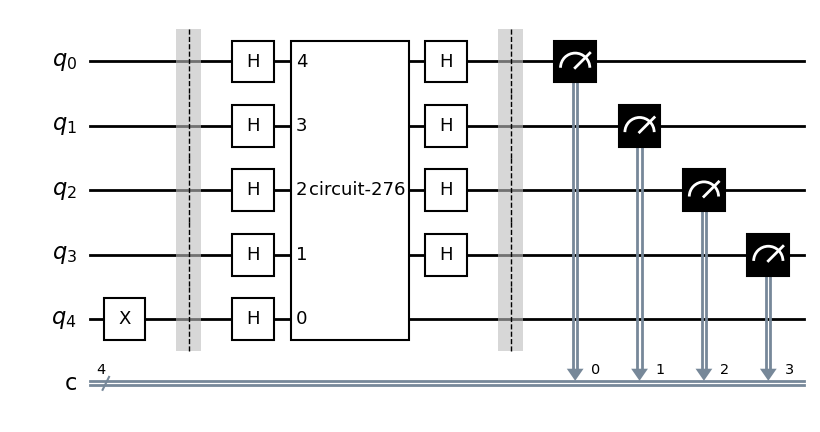

In [17]:
# (DJ2) Panaudokite anksčiau parašytą funkciją nuosavai 
# Deustch-Jozsa algorimo implementacijai qiskit aplinkoje.


#DJinput= "01011010010110101010010110100101"
DJinput="1111111111111111"
#DJinput="00"
#DJinput="1010101010101010"
l=int(np.log2(len(DJinput))+1)

qc=QuantumCircuit(l, l-1)
qc.x(l-1)
qc.barrier()
qc.h(range(l))
qc.append(DJmatrix(DJinput), range(l-1, -1,-1))
qc.h(range(l-1))
qc.barrier()
qc.measure(range(l-1), range(l-1))




nc=transpile(qc, backend)
run=backend.run(nc)
result=run.result()
counts = result.get_counts(qc)
print(counts)

#187 page of "Quantum computing for computer scientists"
if list(counts.keys())[0].count('1') > 0:
    print ("balanced")
else:
    print ("constant")
qc.draw('mpl', style="bw")

##### Bernstein-Vazirani problema

f(x)=s⋅x


1)teisingumo lentelė:

s = (0,1,0,0,1)


| q0 | q1 | q2| q3 | q4| f(x)|
|--- |--- |---| ---|---| --- |
|0|0|0|0|0| 0|
|0|0|0|0|1| 1|
|0|0|0|1|0| 0|
|0|0|0|1|1| 1|
|0|0|1|0|0| 0|
|0|0|1|0|1| 1|
|0|0|1|1|0| 0|
|0|0|1|1|1| 1|
|0|1|0|0|0| 1|
|0|1|0|0|1| 0|
|0|1|0|1|0| 1|
|0|1|0|1|1| 0|
|0|1|1|0|0| 1|
|0|1|1|0|1| 0|
|0|1|1|1|0| 1|
|0|1|1|1|1| 0|
|1|0|0|0|0| 0|
|1|0|0|0|1| 1|
|1|0|0|1|0| 0|
|1|0|0|1|1| 1|
|1|0|1|0|0| 0|
|1|0|1|0|1| 1|
|1|0|1|1|0| 0|
|1|0|1|1|1| 1|
|1|1|0|0|0| 1|
|1|1|0|0|1| 0|
|1|1|0|1|0| 1|
|1|1|0|1|1| 0|
|1|1|1|0|0| 1|
|1|1|1|0|1| 0|
|1|1|1|1|0| 1|
|1|1|1|1|1| 0|

In [7]:
# Parašykite funkciją, kuri pagal nurodytą bitų skaičių 
# generuoja atsitiktinę Bernstein-Vazirani funkciją.

def BVfunction(bits):
    s=np.random.randint(2**bits-1)
    ans=""
    for i in range(2**bits):
        ands = s&i
        count =0
        while ands:
            count += ands & 1
            ands >>= 1
        ans+=str(count%2)

    print (str(bin(s))[2:], ans)

BVfunction(5)

10101 01011010010110101010010110100101


In [8]:
# Parašykite klasikinę funkciją, kuri pagal n-bitų funkciją, 
# kuri užduota kaip tekstinė eilutė (panašiai kaip DJ1 uždavinyje), 
# patikrina ar ji yra Bernstein-Vazirani funkcija.

def getBV(s:str, bits):
    ans=""
    
    for i in range(2**bits):
        ands = s&i
        count =0
        while ands:
            count += ands & 1
            ands >>= 1
        ans+=str(count%2)
    return ans

def isBV(func:str):
    bits=int(np.log2(len(func)))
    print (bits)
    s=0
    for i in range(1,2**bits):
        if np.log2(i)%1==0:
            if func[i]=="1":
                s+=i
    
    if func == getBV(s, bits):
        return True
    return False


print(isBV("00111100001111001100001111000011"))

5
True


{'11110': 66, '00000': 64, '00001': 57, '10101': 61, '01011': 63, '10100': 75, '01111': 75, '01110': 65, '00101': 55, '11010': 66, '10001': 65, '00100': 66, '11111': 57, '01010': 61, '10000': 63, '11011': 65}

s= 01010


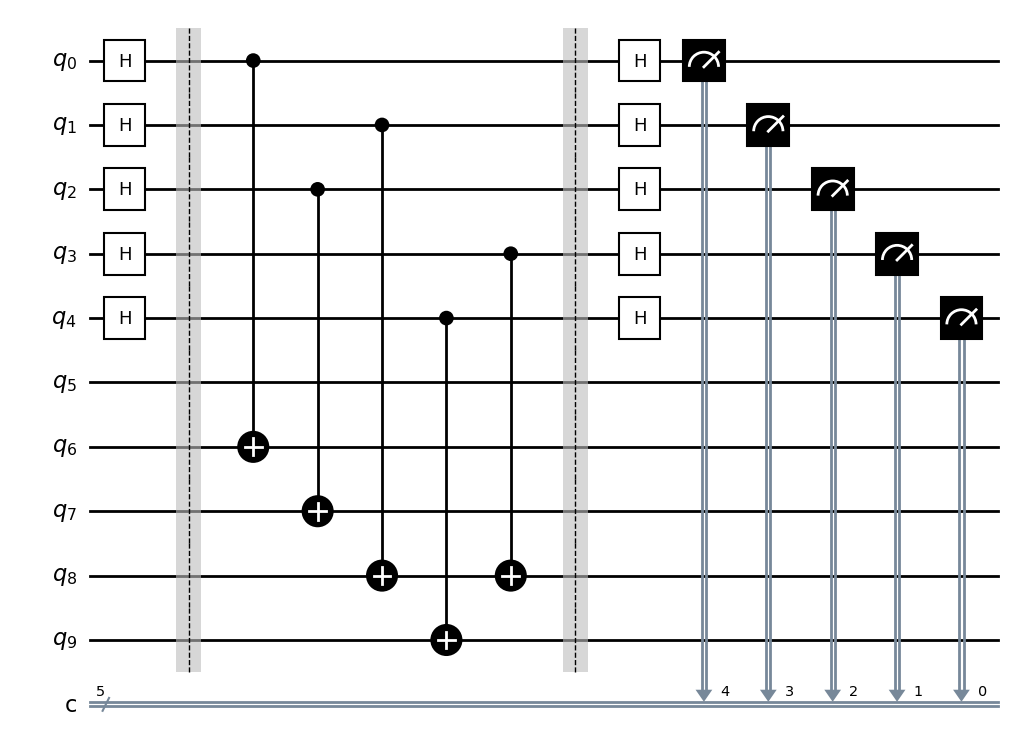

In [9]:
#Naudodami vartus X, CNOT, ir CCNOT sukurkite pilną kvantinę shemą
#5 bitų Simono algorimui pagal duotąjį binarinį vektorių s
#Funkcijos reikšmes tinkamai parinkite savarankiškai.

# s=01010
def getS(counts):
    for j in range(1,32):
        a=0
        s='0'*(5-len(str(bin(j))[2:]))+str(bin(j)[2:])
        for i in counts:
            
            f=int(s[0])*int(i[0])
            f+=int(s[1])*int(i[1])
            f+=int(s[2])*int(i[2])
            f+=int(s[3])*int(i[3])
            f+=int(s[4])*int(i[4])
            if f%2==0:
                a+=1
        if a==16:
            return (s)

#anf=ANFform([a,b,c,d,e], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
#print (anf)
#anf=ANFform([a,b,c,d,e], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
#print (anf)
#anf=ANFform([a,b,c,d,e], [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1])
#print (anf)
#anf=ANFform([a,b,c,d,e], [0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0])
#print (anf)
#anf=ANFform([a,b,c,d,e], [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1])
#print (anf)

qc=QuantumCircuit(10,5)

qc.h(range(5))
qc.barrier()
qc.cx(0, 6)
qc.cx(2, 7)
qc.cx(1, 8)
qc.cx(3, 8)
qc.cx(4, 9)

qc.barrier()



qc.h(range(5))
qc.measure(range(0, 5), range(4, -1,-1))




nc=transpile(qc, backend)
run=backend.run(nc)
result=run.result()
counts = result.get_counts(qc)
print(counts)
print("\ns=", getS(counts))


qc.draw('mpl', style='bw')


In [10]:
from sympy.physics.quantum import Bra, Ket
from sympy.physics.quantum.tensorproduct import TensorProduct
from sympy.physics.quantum.gate import HadamardGate, IdentityGate
from sympy.physics.quantum.qapply import qapply

display(Ket('phi0'),TensorProduct(Ket('00000'), Ket('00000')))

def kets():
    s=(str(bin(0))[2:])
    l=len(s)
    t=TensorProduct(Ket('00000'), Ket('0'*(5-l)+s))
    for i in range(1, 2**5):
        s=(str(bin(i))[2:])
        l=len(s)
        t+=TensorProduct(Ket('00000'), Ket('0'*(5-l)+s))

    return t
phi1=1/sp.sqrt(32)*kets()
display(Ket('phi1'),phi1)


def val():
    t=0
    k=0
    ss=10
    for i in range( 2**5):
        s=(str(bin(i))[2:])
        l=len(s)
        if ss^i>i:
            ks=(str(bin(k))[2:])
            kl=len(ks)
            t+=TensorProduct(Ket('0'*(5-kl)+ks), Ket('0'*(5-l)+s))
            s=(str(bin(i^ss))[2:])
            l=len(s)
            t+=TensorProduct(Ket('0'*(5-kl)+ks), Ket('0'*(5-l)+s))
            k+=1
    return t

phi2=1/sp.sqrt(32)*val()
display(Ket('phi2'), phi2)


def third ():
    
    ss=10
    f=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    ans=0
    k=0
    for i in range( 2**5):
        s=(str(bin(i))[2:])
        l=len(s)
        if ss^i>i:
            f[i]=k
            f[i^ss]=k
            k+=1
    print (f)
        
    for i in range(32): 
        s=(str(bin(i))[2:])
        ss=""
        s='0'*(5- len(s))+s
        pas=0
        for j in range(32):
            
            ss=(str(bin(f[j]))[2:])
            ss='0'*(5- len(ss))+ss
            count = 0
            result = i & j
            
            while result:
                # Increment count if the least significant bit is 1
                count += result & 1
                # Right shift the result to check the next bit
                result >>= 1
            pas+=Ket(ss)*((-1)**count)
        

        if pas!=0:
            ans+=TensorProduct(Ket(s), pas)
            
    return sp.simplify(ans)


phi3=(1/sp.sqrt(2**5))**2
phi3*=third()
phi3=sp.simplify(phi3)
display(Ket('phi3'), sp.nsimplify(phi3))




|phi0>

|00000>x|00000>

|phi1>

sqrt(2)*(|00000>x|00000> + |00000>x|00001> + |00000>x|00010> + |00000>x|00011> + |00000>x|00100> + |00000>x|00101> + |00000>x|00110> + |00000>x|00111> + |00000>x|01000> + |00000>x|01001> + |00000>x|01010> + |00000>x|01011> + |00000>x|01100> + |00000>x|01101> + |00000>x|01110> + |00000>x|01111> + |00000>x|10000> + |00000>x|10001> + |00000>x|10010> + |00000>x|10011> + |00000>x|10100> + |00000>x|10101> + |00000>x|10110> + |00000>x|10111> + |00000>x|11000> + |00000>x|11001> + |00000>x|11010> + |00000>x|11011> + |00000>x|11100> + |00000>x|11101> + |00000>x|11110> + |00000>x|11111>)/8

|phi2>

sqrt(2)*(|00000>x|00000> + |00000>x|01010> + |00001>x|00001> + |00001>x|01011> + |00010>x|00010> + |00010>x|01000> + |00011>x|00011> + |00011>x|01001> + |00100>x|00100> + |00100>x|01110> + |00101>x|00101> + |00101>x|01111> + |00110>x|00110> + |00110>x|01100> + |00111>x|00111> + |00111>x|01101> + |01000>x|10000> + |01000>x|11010> + |01001>x|10001> + |01001>x|11011> + |01010>x|10010> + |01010>x|11000> + |01011>x|10011> + |01011>x|11001> + |01100>x|10100> + |01100>x|11110> + |01101>x|10101> + |01101>x|11111> + |01110>x|10110> + |01110>x|11100> + |01111>x|10111> + |01111>x|11101>)/8

[ 0  1  2  3  4  5  6  7  2  3  0  1  6  7  4  5  8  9 10 11 12 13 14 15
 10 11  8  9 14 15 12 13]


|phi3>

(|00000>x(|00000> + |00001> + |00010> + |00011> + |00100> + |00101> + |00110> + |00111> + |01000> + |01001> + |01010> + |01011> + |01100> + |01101> + |01110> + |01111>) + |00001>x(|00000> - |00001> + |00010> - |00011> + |00100> - |00101> + |00110> - |00111> + |01000> - |01001> + |01010> - |01011> + |01100> - |01101> + |01110> - |01111>) + |00100>x(|00000> + |00001> + |00010> + |00011> - |00100> - |00101> - |00110> - |00111> + |01000> + |01001> + |01010> + |01011> - |01100> - |01101> - |01110> - |01111>) + |00101>x(|00000> - |00001> + |00010> - |00011> - |00100> + |00101> - |00110> + |00111> + |01000> - |01001> + |01010> - |01011> - |01100> + |01101> - |01110> + |01111>) + |01010>x(|00000> + |00001> - |00010> - |00011> + |00100> + |00101> - |00110> - |00111> + |01000> + |01001> - |01010> - |01011> + |01100> + |01101> - |01110> - |01111>) + |01011>x(|00000> - |00001> - |00010> + |00011> + |00100> - |00101> - |00110> + |00111> + |01000> - |01001> - |01010> + |01011> + |01100> - |01101> - 


Iš čia gauname:

(pirmi 5 kubitai)

<00000,c>=0

<00001,c>=0

<00100,c>=0

<00101,c>=0

<01010,c>=0 

<01011,c>=0 

<01110,c>=0 

<01111,c>=0  

<10000,c>=0 

<10001,c>=0  

<10100,c>=0 

<10101,c>=0  

<11010,c>=0  

<11011,c>=0  

<11110,c>=0  

<11111,c>=0 

In [11]:

got=['00000', '00001', '00100', '00101', '01010', '01011', '01110', '01111', '10000', '10001', '10100', '10101', '11010', '11011', '11110', '11111']

print("tikrinam: ",getS(got))


tikrinam:  01010
